# **Functions**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [52]:
@njit
def lattices(N, M):
    return np.random.choice([-1, 1], size=(N, M))
@njit
def ec(latt):
    N=len(latt)
    energy = 0 
    for i in range(len(latt)):
        for j in range(len(latt)):
            S = latt[i,j]
            nb = latt[(i+1)%N, j] + latt[i,(j+1)%N]
            energy += -nb*S
    return energy
@njit
def mc(latt):
    return np.abs(np.sum(latt))
@njit
def mcmove(latt, beta,N):
    a = np.random.randint(0, N)
    b = np.random.randint(0, N)
    s =  latt[a, b]
    fn = latt[(a+1)%N,b] + latt[a,(b+1)%N] + latt[(a-1)%N,b] + latt[a,(b-1)%N]
    tst = 2*s*fn
    
    if tst < 0:
        s *= -1
    elif np.random.rand() < np.exp(-tst*beta):
        s *= -1
    latt[a, b] = s
    ecz=ec(latt)
    mcz=mc(latt)
    return ecz,mcz
@njit
def sim(L,k,n):
    es=[]
    ms=[]
    while k>0:
        for i in range(50000):
            mcmove(L,1/k,n)
        for i in range(n**3):
            ee,mm=mcmove(L,1/k,n)
        es.append(ee)
        ms.append(mm)
        k=k-0.1
    return np.array(es),np.array(ms)

# **For n=8**

In [47]:
n=8
k=4
temp=np.arange(4,0,-0.1)
Le=[]
Lm=[]
Le2=[]
Lm2=[]
for i in range(5):
    L=np.random.choice([-1, 1], size=(n, n))
    #plt.matshow(L)
    es,ms=sim(L,k,n)
    #plt.matshow(L)
    Le.append(es)
    Lm.append(ms)
    Le2.append(es**2)
    Lm2.append(ms**2)
EEE8=[]
MMM8=[]
EEE28=[]
MMM28=[]
for i in range(40):
    EEE8.append(np.mean(np.array(Le).T[i]))
    MMM8.append(np.mean(np.array(Lm).T[i]))
    EEE28.append(np.mean(np.array(Le2).T[i]))
    MMM28.append(np.mean(np.array(Lm2).T[i]))
a1=np.array(MMM8)**2
a2=np.array(MMM28)
khi8=(1/temp)*(a2-a1)
b1=np.array(EEE8)**2
b2=np.array(EEE28)
cv8=(1/temp**2)*(b2-b1)

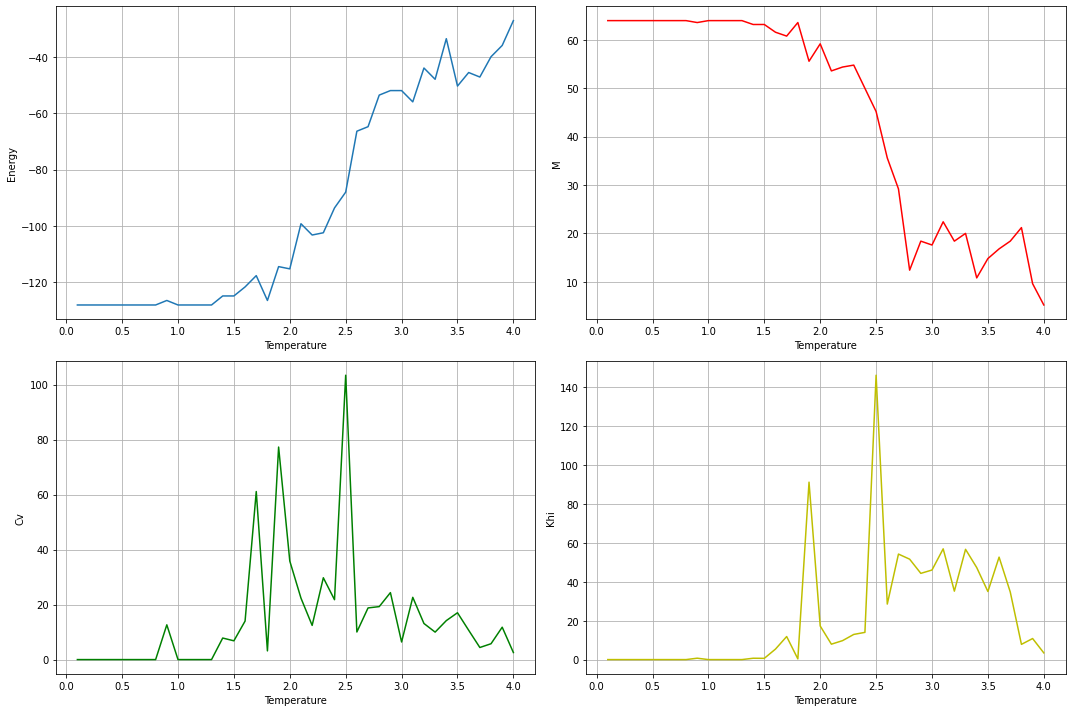

In [48]:
fig, axes = plt.subplots(2, 2,figsize=(15,10))  
axes[0,0].plot(temp, EEE8, '-')
axes[0,0].set_xlabel("Temperature") 
axes[0,0].set_ylabel("Energy") 
axes[0,0].grid()
#
axes[0,1].plot(temp, MMM8, 'r-')
axes[0,1].set_xlabel("Temperature") 
axes[0,1].set_ylabel("M") 
axes[0,1].grid()
#
axes[1,0].plot(temp, cv8, 'g-') 
axes[1,0].set_xlabel("Temperature") 
axes[1,0].set_ylabel("Cv")
axes[1,0].grid()
#
axes[1,1].plot(temp, khi8, 'y-')
axes[1,1].set_xlabel("Temperature") 
axes[1,1].set_ylabel("Khi")
axes[1,1].grid()
#
plt.tight_layout()


# **For n=16**

In [28]:
n=16
k=4
temp=np.arange(4,0,-0.1)
Le=[]
Lm=[]
Le2=[]
Lm2=[]
for i in range(5):
    L=np.random.choice([-1, 1], size=(n, n))
    #plt.matshow(L)
    es,ms=sim(L,k,n)
    #plt.matshow(L)
    Le.append(es)
    Lm.append(ms)
    Le2.append(es**2)
    Lm2.append(ms**2)
EEE16=[]
MMM16=[]
EEE216=[]
MMM216=[]
for i in range(40):
    EEE16.append(np.mean(np.array(Le).T[i]))
    MMM16.append(np.mean(np.array(Lm).T[i]))
    EEE216.append(np.mean(np.array(Le2).T[i]))
    MMM216.append(np.mean(np.array(Lm2).T[i]))
a1=np.array(MMM16)**2
a2=np.array(MMM216)
khi16=(1/temp)*(a2-a1)
b1=np.array(EEE16)**2
b2=np.array(EEE216)
cv16=(1/temp**2)*(b2-b1)

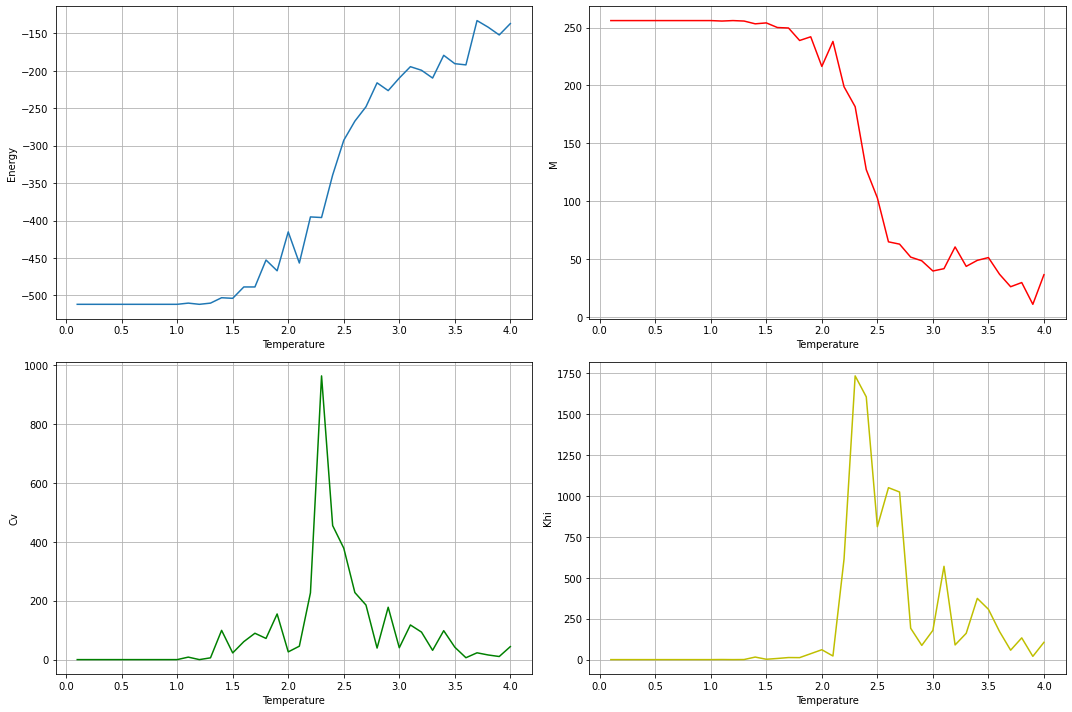

In [29]:
fig, axes = plt.subplots(2, 2,figsize=(15,10))  
axes[0,0].plot(temp, EEE16, '-')
axes[0,0].set_xlabel("Temperature") 
axes[0,0].set_ylabel("Energy") 
axes[0,0].grid()
#
axes[0,1].plot(temp, MMM16, 'r-')
axes[0,1].set_xlabel("Temperature") 
axes[0,1].set_ylabel("M") 
axes[0,1].grid()
#
axes[1,0].plot(temp, cv16, 'g-') 
axes[1,0].set_xlabel("Temperature") 
axes[1,0].set_ylabel("Cv")
axes[1,0].grid()
#
axes[1,1].plot(temp, khi16, 'y-')
axes[1,1].set_xlabel("Temperature") 
axes[1,1].set_ylabel("Khi")
axes[1,1].grid()
#
plt.tight_layout()

# **For n=32**

In [146]:
n=32
k=4
temp=np.arange(4,0,-0.1)
Le=[]
Lm=[]
Le2=[]
Lm2=[]
for i in range(5):
    L=np.random.choice([-1, 1], size=(n, n))
    #plt.matshow(L)
    es,ms=sim(L,k,n)
    #plt.matshow(L)
    Le.append(es)
    Lm.append(ms)
    Le2.append(es**2)
    Lm2.append(ms**2)
EEE32=[]
MMM32=[]
EEE232=[]
MMM232=[]
for i in range(40):
    EEE32.append(np.mean(np.array(Le).T[i]))
    MMM32.append(np.mean(np.array(Lm).T[i]))
    EEE232.append(np.mean(np.array(Le2).T[i]))
    MMM232.append(np.mean(np.array(Lm2).T[i]))
a1=np.array(MMM32)**2
a2=np.array(MMM232)
khi32=(1/temp)*(a2-a1)
b1=np.array(EEE32)**2
b2=np.array(EEE232)
cv32=(1/temp**2)*(b2-b1)

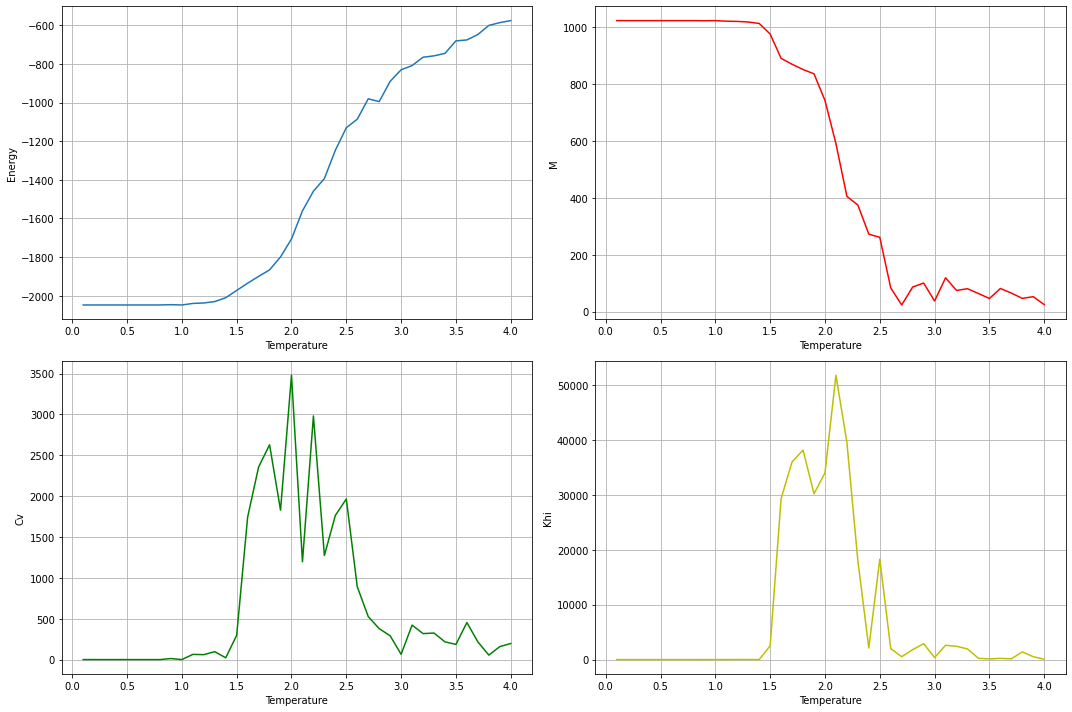

In [147]:
fig, axes = plt.subplots(2, 2,figsize=(15,10))  
axes[0,0].plot(temp, EEE32, '-')
axes[0,0].set_xlabel("Temperature") 
axes[0,0].set_ylabel("Energy") 
axes[0,0].grid()
#
axes[0,1].plot(temp, MMM32, 'r-')
axes[0,1].set_xlabel("Temperature") 
axes[0,1].set_ylabel("M") 
axes[0,1].grid()
#
axes[1,0].plot(temp, cv32, 'g-') 
axes[1,0].set_xlabel("Temperature") 
axes[1,0].set_ylabel("Cv")
axes[1,0].grid()
#
axes[1,1].plot(temp, khi32, 'y-')
axes[1,1].set_xlabel("Temperature") 
axes[1,1].set_ylabel("Khi")
axes[1,1].grid()
#
plt.tight_layout()

# **For n=64**

In [55]:
n=64
k=4
temp=np.arange(4,0,-0.1)
Le=[]
Lm=[]
Le2=[]
Lm2=[]
for i in range(5):
    L=np.random.choice([-1, 1], size=(n, n))
    #plt.matshow(L)
    es,ms=sim(L,k,n)
    #plt.matshow(L)
    Le.append(es)
    Lm.append(ms)
    Le2.append(es**2)
    Lm2.append(ms**2)
EEE64=[]
MMM64=[]
EEE264=[]
MMM264=[]
for i in range(40):
    EEE64.append(np.mean(np.array(Le).T[i]))
    MMM64.append(np.mean(np.array(Lm).T[i]))
    EEE264.append(np.mean(np.array(Le2).T[i]))
    MMM264.append(np.mean(np.array(Lm2).T[i]))
a1=np.array(MMM64)**2
a2=np.array(MMM264)
khi64=(1/temp)*(a2-a1)
b1=np.array(EEE64)**2
b2=np.array(EEE264)
cv64=(1/temp**2)*(b2-b1)

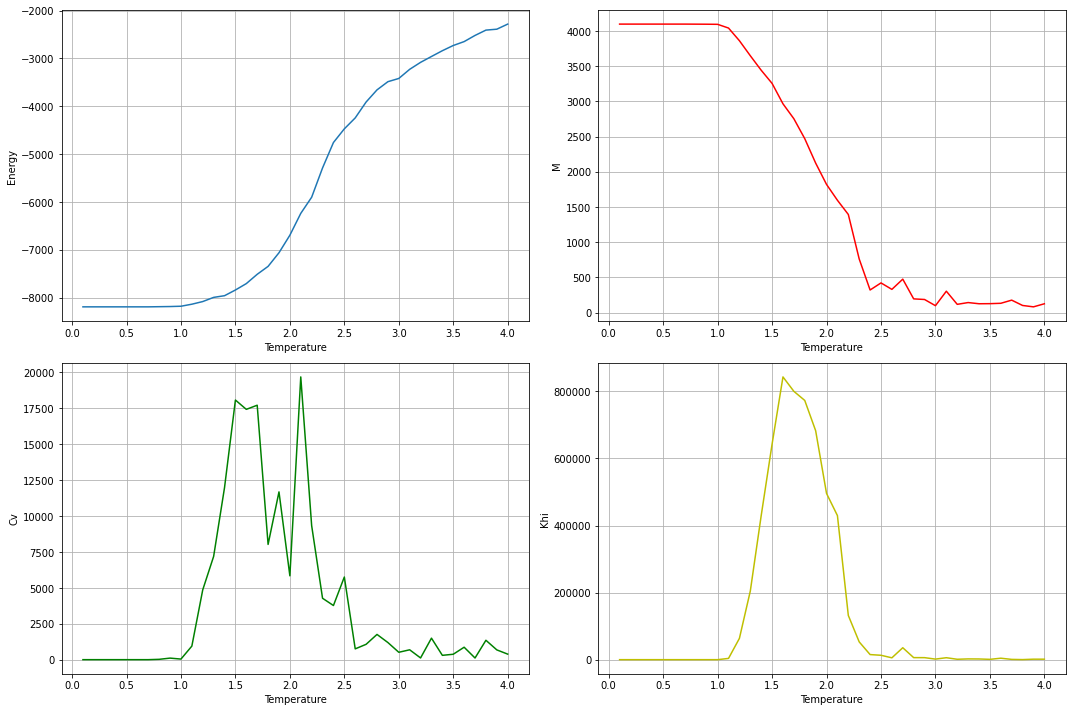

In [56]:
fig, axes = plt.subplots(2, 2,figsize=(15,10))  
axes[0,0].plot(temp, EEE64, '-')
axes[0,0].set_xlabel("Temperature") 
axes[0,0].set_ylabel("Energy") 
axes[0,0].grid()
#
axes[0,1].plot(temp, MMM64, 'r-')
axes[0,1].set_xlabel("Temperature") 
axes[0,1].set_ylabel("M") 
axes[0,1].grid()
#
axes[1,0].plot(temp, cv64, 'g-') 
axes[1,0].set_xlabel("Temperature") 
axes[1,0].set_ylabel("Cv")
axes[1,0].grid()
#
axes[1,1].plot(temp, khi64, 'y-')
axes[1,1].set_xlabel("Temperature") 
axes[1,1].set_ylabel("Khi")
axes[1,1].grid()
#
plt.tight_layout()

# **Exponents**

In [57]:
cv8

array([  2.56      ,  11.78172255,   5.76177285,   4.3944485 ,
        10.66666667,  17.03183673,  14.17301038,   9.99081726,
        13.125     ,  22.64308012,   6.4       ,  24.35196195,
        19.26530612,  18.78737997,  10.03550296, 103.424     ,
        21.77777778,  29.76181474,  12.42975207,  22.34920635,
        35.84      ,  77.29639889,   3.16049383,  61.12110727,
        14.        ,   6.82666667,   7.83673469,   0.        ,
         0.        ,   0.        ,   0.        ,  12.64197531,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [58]:
cv16

array([ 44.16      ,  10.51939513,  15.77839335,  23.09422936,
         6.41975309,  42.10938776,  98.21453287,  31.50045914,
        93.375     , 117.61082206,  40.24888889, 177.76932224,
        39.18367347, 185.24005487, 227.59763314, 378.2656    ,
       454.88888889, 963.02457467, 226.6446281 ,  45.569161  ,
        26.24      , 154.94736842,  71.90123457,  89.46712803,
        61.        ,  22.75555556,  99.26530612,   6.0591716 ,
         0.        ,   8.46280992,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [148]:
cv32

array([ 196.8       ,  158.46416831,   54.69252078,  216.917458  ,
        453.33333333,  185.67836735,  216.80276817,  324.76033058,
        317.875     ,  421.82726327,   64.42666667,  291.15814507,
        378.28571429,  526.22222222,  891.4556213 , 1964.6464    ,
       1763.77777778, 1273.46691871, 2981.02479339, 1196.40816327,
       3479.36      , 1828.52077562, 2628.34567901, 2356.26297578,
       1743.5       ,  296.96      ,   21.55102041,   96.94674556,
         60.44444444,   63.47107438,    0.        ,   12.64197531,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

In [92]:
cv64

array([  385.2       ,   680.226167  ,  1349.40720222,   115.19065011,
         865.97530864,   376.3722449 ,   301.73010381,  1497.09458219,
         119.        ,   686.88449532,   514.13333333,  1192.02853746,
        1756.40816327,  1068.42249657,   751.71597633,  5752.2176    ,
        3768.44444445,  4273.84499055,  9328.39669421, 19679.49206349,
        5835.84      , 11677.07479224,  8020.93827161, 17709.61937716,
       17421.5       , 18070.75555556, 11975.18367347,  7186.1775148 ,
        4860.44444444,   943.60330578,    40.96      ,   107.45679011,
          23.99999999,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ])

dar cv64 2ta ghole didam baraye hamin beyne oonaro maximum gereftam

In [90]:
np.argmax(cv64)

19

In [117]:
(19+23)/2

21.0

In [171]:
tci=temp[19]

In [135]:
tc8=temp[np.argmax(cv8)]

In [136]:
tc16=temp[np.argmax(cv16)]

In [149]:
tc32=temp[np.argmax(cv32)]

In [177]:
Ls=[8,16,32]
tc=[tci-tc8,tci-tc16,tci-tc32]
tc=np.abs(tc)

In [178]:
tc

array([0.4, 0.2, 0.1])

In [204]:
m1, b = np.polyfit(np.log(tc),np.log(Ls), 1)

Text(0, 0.5, 'Log(L)')

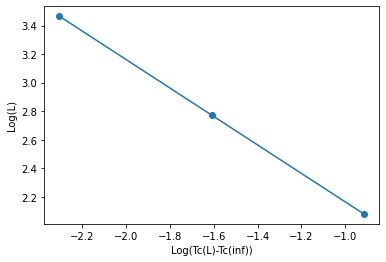

In [208]:
plt.scatter(np.log(tc),np.log(Ls))
plt.plot(np.log(np.linspace(0.1,0.4)),m1*np.log(np.linspace(0.1,0.4))+b)
plt.xlabel("Log(Tc(L)-Tc(inf))")
plt.ylabel("Log(L)")

In [182]:
nou=-m1

In [183]:
nou

1.0

In [184]:
Lss=[8,16,32,64]
cvm=[np.max(cv8),np.max(cv16),np.max(cv32),np.max(cv64)]

In [198]:
m2, b2 = np.polyfit(np.log(Lss),np.log(cvm), 1)

Text(0, 0.5, 'Log(Cv)')

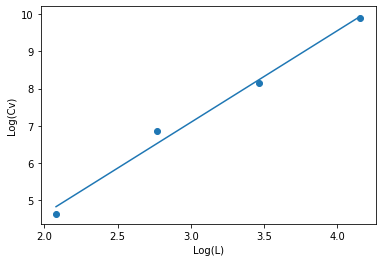

In [199]:
plt.scatter(np.log(Lss),np.log(cvm))
plt.plot(np.log(np.linspace(8,64)),m2*np.log(np.linspace(8,64))+b2)
plt.xlabel("Log(L)")
plt.ylabel("Log(Cv)")

In [200]:
alpha=nou*m2

In [201]:
alpha

2.4569111937828727

In [189]:
Lss=[8,16,32,64]
khim=[np.max(khi8),np.max(khi16),np.max(khi32),np.max(khi64)]

In [196]:
m3, b3 = np.polyfit(np.log(Lss),np.log(khim), 1)

Text(0, 0.5, 'Log(X)')

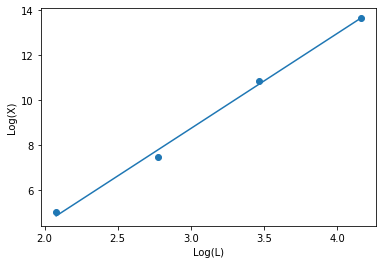

In [197]:
plt.scatter(np.log(Lss),np.log(khim))
plt.plot(np.log(np.linspace(8,64)),m3*np.log(np.linspace(8,64))+b3)
plt.xlabel("Log(L)")
plt.ylabel("Log(X)")

In [192]:
gamma=m3*nou

In [193]:
gamma

4.237959541659901

In [209]:
print("alpha is: ",alpha,"gamma is: ",gamma,"nou is: ",nou)

alpha is:  2.4569111937828727 gamma is:  4.237959541659901 nou is:  1.0
